In [3]:
import sqlite3
connection = sqlite3.connect('./vivino.db')
cursor = connection.cursor()

In [50]:
wine_names = ["Finn Pinot Noir",
"Grace Vineyard Pinot Noir",
"Mark Bradford Vineyard Pinot Noir",
"Alpine Hillside Pinot Noir",
"Chacra Treinta y Dos Pinot Noir 2019","Chloe Chardonnay",
"Reserve Chardonnay",
"Bentrock Vineyard Chardonnay",
"Capensis Chardonnay 2016",
"Capensis Chardonnay 2017","Cabernet Sauvignon", "Scarecrow Cabernet Sauvignon 2015", "Special Selection Cabernet Sauvignon", "Leonetti Cabernet Sauvignon 2006","Caymus Special Selection Cabernet Sauvignon 2017"]

query = '''
    SELECT DISTINCT wines.name, countries.name
    FROM vintages
    JOIN wines ON vintages.wine_id = wines.id
    JOIN regions ON wines.region_id = regions.id
    JOIN countries ON regions.country_code = countries.code
    WHERE wines.name IN ({})
'''.format(','.join(['?']*len(wine_names)))

cursor.execute(query, wine_names)
result = cursor.fetchall()

for row in result:
    wine_name, country_name = row
    print(f"{wine_name}: {country_name}")

Special Selection Cabernet Sauvignon: États-Unis
Cabernet Sauvignon: États-Unis
Grace Vineyard Pinot Noir: États-Unis
Mark Bradford Vineyard Pinot Noir: États-Unis
Finn Pinot Noir: États-Unis
Cabernet Sauvignon: Italie
Bentrock Vineyard Chardonnay: États-Unis
Alpine Hillside Pinot Noir: États-Unis
Reserve Chardonnay: Afrique du Sud
Chloe Chardonnay: États-Unis


In [21]:
query = '''
        SELECT distinct wines.name , countries.users_count
        From wines       
        join regions ON wines.region_id = regions.id
        join countries ON regions.country_code = countries.code
        
        WHERE wines.name IN (SELECT name 
       FROM Cabernet_Sauvignon
       ORDER BY ratings_average DESC
       LIMIT 5)'''

cursor.execute(query)
cursor.fetchall()

[('Cabernet Sauvignon', 12273684),
 ('Cabernet Sauvignon', 4270717),
 ('Special Selection Cabernet Sauvignon', 12273684)]

In [22]:
query = '''
        SELECT distinct wines.name , countries.users_count
        From wines       
        join regions ON wines.region_id = regions.id
        join countries ON regions.country_code = countries.code
        
        WHERE wines.name IN (SELECT name 
       FROM Chardonnay
       ORDER BY ratings_average DESC
       LIMIT 5)'''

cursor.execute(query)
cursor.fetchall()

[('Chloe Chardonnay', 12273684),
 ('Reserve Chardonnay', 269649),
 ('Bentrock Vineyard Chardonnay', 12273684)]

In [24]:
query = '''
        SELECT distinct wines.name , countries.users_count
        From wines       
        join regions ON wines.region_id = regions.id
        join countries ON regions.country_code = countries.code
        
        WHERE wines.name IN (SELECT name 
       FROM Pinot_Noir
       ORDER BY ratings_average DESC
       LIMIT 5)'''

cursor.execute(query)
cursor.fetchall()

[('Finn Pinot Noir', 12273684),
 ('Grace Vineyard Pinot Noir', 12273684),
 ('Mark Bradford Vineyard Pinot Noir', 12273684),
 ('Alpine Hillside Pinot Noir', 12273684)]

In [131]:
list_of_countries = []
for x in cursor.execute('''SELECT name FROM countries'''):
    list_of_countries.append(x[0])
print(list_of_countries)

['Italie', 'France', 'États-Unis', 'Espagne', 'Portugal', 'Australie', 'Hongrie', 'Afrique du Sud', 'Allemagne', 'Chili', 'Moldavie', 'Argentine', 'Grèce', 'Israël', 'Roumanie', 'Croatie', 'Suisse']


In [135]:
import pandas as pd

list_of_countries = []
for x in cursor.execute('''SELECT name FROM countries'''):
    list_of_countries.append(x[0])
print(list_of_countries)

data = []

for country in list_of_countries:
    query1 = f'''
    SELECT COUNT(DISTINCT vintages.name)
    FROM countries
    JOIN regions ON regions.country_code = countries.code
    JOIN wines ON wines.region_id = regions.id
    JOIN vintages ON vintages.wine_id = wines.id
    WHERE countries.name = '{country}'
    '''

    query2 = f'''
    SELECT COUNT(DISTINCT wines.name)
    FROM countries
    JOIN regions ON regions.country_code = countries.code
    JOIN wines ON wines.region_id = regions.id
    WHERE countries.name = '{country}'
    '''

    wine_count = 0
    vintage_count = 0

    for row in cursor.execute(query2):
        wine_count = row[0]

    for row in cursor.execute(query1):
        vintage_count = row[0]

    data.append([country, wine_count, vintage_count, wine_count + vintage_count])

    print(f"Country: {country}")
    print(f"Total Wine Count: {wine_count}")
    print(f"Total Vintage Count: {vintage_count}")
    print(f"Total count in {country}: {wine_count + vintage_count}")
    print()
df = pd.DataFrame(data, columns=['Country', 'Wine Count', 'Vintage Count', 'Total Count'])
print(df)

['Italie', 'France', 'États-Unis', 'Espagne', 'Portugal', 'Australie', 'Hongrie', 'Afrique du Sud', 'Allemagne', 'Chili', 'Moldavie', 'Argentine', 'Grèce', 'Israël', 'Roumanie', 'Croatie', 'Suisse']
Country: Italie
Total Wine Count: 318
Total Vintage Count: 902
Total count in Italie: 1220

Country: France
Total Wine Count: 252
Total Vintage Count: 721
Total count in France: 973

Country: États-Unis
Total Wine Count: 68
Total Vintage Count: 112
Total count in États-Unis: 180

Country: Espagne
Total Wine Count: 90
Total Vintage Count: 131
Total count in Espagne: 221

Country: Portugal
Total Wine Count: 26
Total Vintage Count: 31
Total count in Portugal: 57

Country: Australie
Total Wine Count: 12
Total Vintage Count: 16
Total count in Australie: 28

Country: Hongrie
Total Wine Count: 9
Total Vintage Count: 14
Total count in Hongrie: 23

Country: Afrique du Sud
Total Wine Count: 22
Total Vintage Count: 32
Total count in Afrique du Sud: 54

Country: Allemagne
Total Wine Count: 14
Total Vin

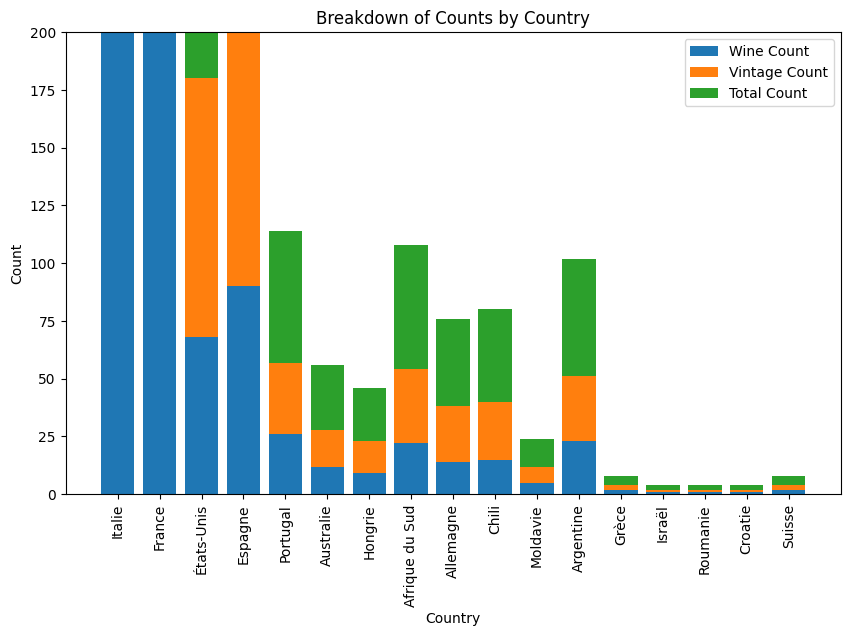

In [150]:

countries = df['Country']
wine_counts = df['Wine Count']
vintage_counts = df['Vintage Count']
total_counts = df['Total Count']

plt.figure(figsize=(10, 6))
plt.bar(countries, wine_counts, label='Wine Count')
plt.bar(countries, vintage_counts, bottom=wine_counts, label='Vintage Count')
plt.bar(countries, total_counts, bottom=[i+j for i,j in zip(wine_counts, vintage_counts)], label='Total Count')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Breakdown of Counts by Country')
plt.ylim(0, 200)


plt.legend()
plt.xticks(rotation=90)
plt.show()

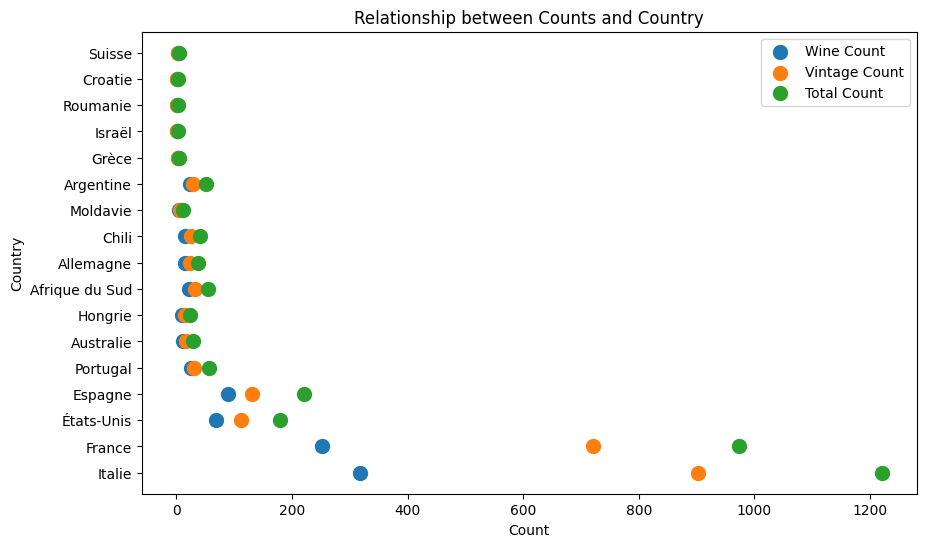

In [141]:
countries = df['Country']
wine_counts = df['Wine Count']
vintage_counts = df['Vintage Count']
total_counts = df['Total Count']

plt.figure(figsize=(10, 6))
plt.scatter(wine_counts, range(len(countries)), label='Wine Count', s=100)
plt.scatter(vintage_counts, range(len(countries)), label='Vintage Count', s=100)
plt.scatter(total_counts, range(len(countries)), label='Total Count', s=100)

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Relationship between Counts and Country')
plt.legend()
plt.yticks(range(len(countries)), countries)
plt.show()

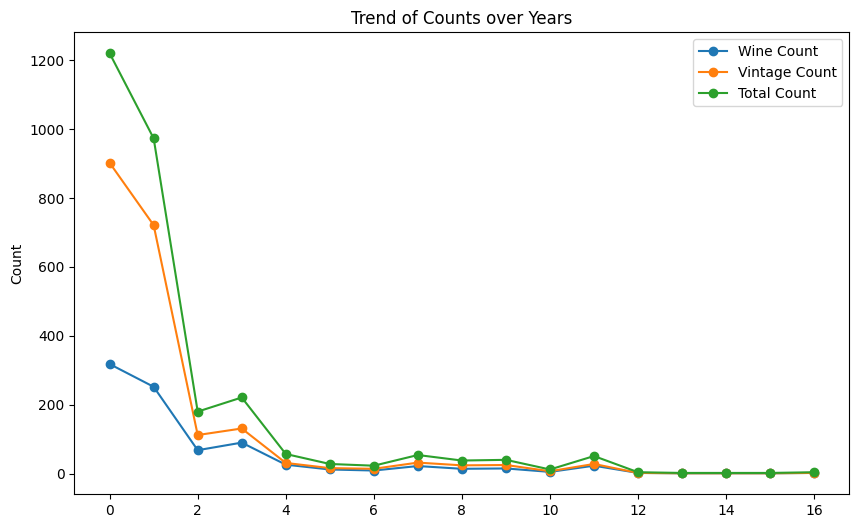

In [146]:
countries = df['Country']
wine_counts = df['Wine Count']
vintage_counts = df['Vintage Count']
total_counts = df['Total Count']


plt.figure(figsize=(10, 6))
plt.plot( wine_counts, marker='o', label='Wine Count')
plt.plot( vintage_counts, marker='o', label='Vintage Count')
plt.plot( total_counts, marker='o', label='Total Count')

plt.ylabel('Count')
plt.title('Trend of Counts over Years')
plt.legend()

plt.show()

In [34]:
query = '''
SELECT wines.name
FROM countries
JOIN regions ON regions.country_code = countries.code
JOIN wines ON wines.region_id = regions.id
WHERE countries.name = 'Italie'
GROUP BY wines.name
  '''
v=0
for x in cursor.execute(query):
    print(x[0])
    v+=1
print(v)

'Giulio Ferrari' Riserva del Fondatore
'Giulio Ferrari' Riserva del Fondatore Rosé
110 e Lode Merlot
123 Brunello di Montalcino Riserva
25 anni Montefalco Sagrantino
5 Stelle Sfursat
50 & 50
50 Old Vines Vecchie Vigne Negroamaro
6 Anime Puglia Rosso
60 Sessantanni Old Vines Primitivo di Manduria
80 Vecchie Vigne Primitivo di Manduria Old Vines
A50 Amarone della Valpolicella
Aegusa
Ai Suma Barbera d'Asti
Altero Brunello di Montalcino
Alàuda
Amarone Classico Monte Danieli
Amarone Della Valpolicella Marta Galli
Amarone Senza Titolo
Amarone Stella
Amarone della Valpolicella
Amarone della Valpolicella Classico
Amarone della Valpolicella Classico Mater
Amarone della Valpolicella Classico Riserva
Amarone della Valpolicella Classico Riserva (Sergio Zenato)
Amarone della Valpolicella Monte Lodoletta
Amarone della Valpolicella Riserva
Amarone della Valpolicella Vigna Garzon
Ampio
Annunziata Barolo Riserva
Arborina Barolo
Asili Barbaresco Vecchie Viti
Baffonero Maremma Toscana
Barbaresco
Barbares

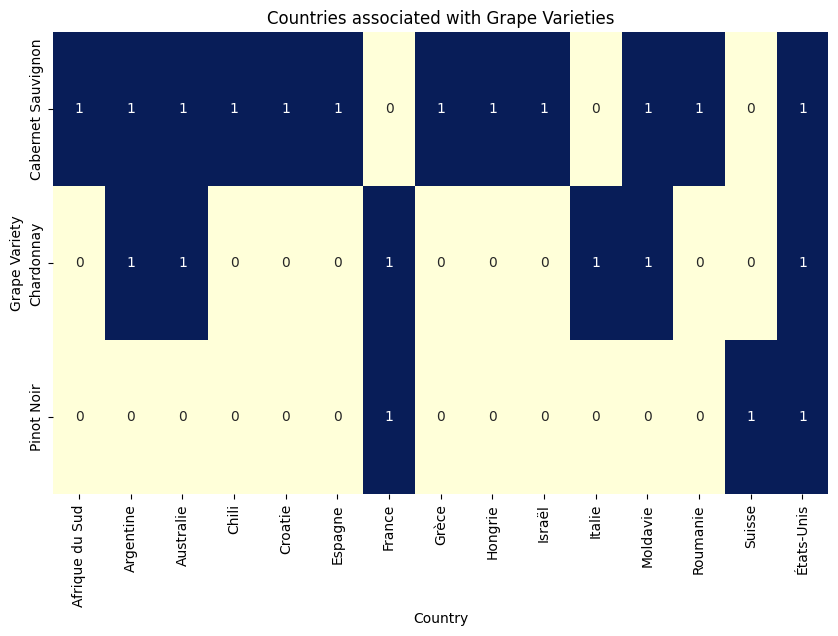

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

connection = sqlite3.connect('./vivino.db')
cursor = connection.cursor()

queries = {
    'Cabernet Sauvignon': """
        SELECT countries.name
        FROM countries
        JOIN most_used_grapes_per_country ON most_used_grapes_per_country.country_code = countries.code
        JOIN grapes ON grapes.id = most_used_grapes_per_country.grape_id
        WHERE grapes.name = 'Cabernet Sauvignon'
    """,
    'Chardonnay': """
        SELECT countries.name
        FROM countries
        JOIN most_used_grapes_per_country ON most_used_grapes_per_country.country_code = countries.code
        JOIN grapes ON grapes.id = most_used_grapes_per_country.grape_id
        WHERE grapes.name = 'Chardonnay'
    """,
    'Pinot Noir': """
        SELECT countries.name
        FROM countries
        JOIN most_used_grapes_per_country ON most_used_grapes_per_country.country_code = countries.code
        JOIN grapes ON grapes.id = most_used_grapes_per_country.grape_id
        WHERE grapes.name = 'Pinot Noir'
    """
}

data = []
for grape_variety, query in queries.items():
    cursor.execute(query)
    results = cursor.fetchall()
    for row in results:
        data.append((grape_variety, row[0]))

df = pd.DataFrame(data, columns=['Grape Variety', 'Country'])

# Reshape the DataFrame using pivot_table
df_pivot = pd.pivot_table(df, index='Grape Variety', columns='Country', aggfunc=len, fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, annot=True, cmap='YlGnBu', cbar=False)

# Set the title and labels
plt.title("Countries associated with Grape Varieties")
plt.xlabel("Country")
plt.ylabel("Grape Variety")

# Display the chart
plt.show()

# Close the database connection
connection.close()

In [70]:
connection = sqlite3.connect('./vivino.db')
cursor = connection.cursor()

query1 = """SELECT grapes.name, grapes.id , most_used_grapes_per_country.country_code
            FROM grapes 
            JOIN most_used_grapes_per_country ON grapes.id = most_used_grapes_per_country.grape_id       
Group BY wines_count
ORDER BY wines_count DESC
LIMIT 5"""

for x in cursor.execute(query1):
        print({'grapes':x[0], 'grape_id':x[1], 'country_code': x[2]})

{'grapes': 'Cabernet Sauvignon', 'grape_id': 2, 'country_code': 'hr'}
{'grapes': 'Chardonnay', 'grape_id': 5, 'country_code': 'ar'}
{'grapes': 'Pinot Noir', 'grape_id': 14, 'country_code': 'ch'}
{'grapes': 'Merlot', 'grape_id': 10, 'country_code': 'ch'}
{'grapes': 'Shiraz/Syrah', 'grape_id': 1, 'country_code': 'il'}


In [71]:
query = """
SELECT countries.name
from countries
JOIN most_used_grapes_per_country ON most_used_grapes_per_country.country_code = countries.code
JOIN grapes ON grapes.id = most_used_grapes_per_country.grape_id
WHERE grapes.name = 'Merlot'
"""
cursor.execute(query)
cursor.fetchall()

[('Italie',),
 ('France',),
 ('Hongrie',),
 ('Afrique du Sud',),
 ('Chili',),
 ('Moldavie',),
 ('Grèce',),
 ('Israël',),
 ('Roumanie',),
 ('Croatie',),
 ('Suisse',)]

In [72]:
query = """
SELECT countries.name
from countries
JOIN most_used_grapes_per_country ON most_used_grapes_per_country.country_code = countries.code
JOIN grapes ON grapes.id = most_used_grapes_per_country.grape_id
WHERE grapes.name = 'Shiraz/Syrah'
"""
cursor.execute(query)
cursor.fetchall()

[('Australie',), ('Afrique du Sud',), ('Israël',)]

In [108]:
# wine and vintage to get price of 15 wines 
# wines.acidity,wines.intensity,wines.sweetness
# no discount - vintages.price_discount_percentage,
q = """
SELECT distinct wines.name AS wine_name,wines.user_structure_count, vintages.price_euros,  vintages.bottle_volume_ml
FROM vintages
JOIN wines ON wines.id = vintages.wine_id
WHERE wines.name IN ('Cabernet Sauvignon', 'Special Selection Cabernet Sauvignon', 'Chloe Chardonnay', 'Reserve Chardonnay', 'Bentrock Vineyard Chardonnay', 'Finn Pinot Noir', 'Grace Vineyard Pinot Noir', 'Mark Bradford Vineyard Pinot Noir', 'Alpine Hillside Pinot Noir')
 
ORDER BY wines.name ASC
"""
cursor.execute(q)
cursor.fetchall()

[('Alpine Hillside Pinot Noir', 5, 133.1, 750),
 ('Bentrock Vineyard Chardonnay', 5, 103.0, 750),
 ('Cabernet Sauvignon', 67, 201.25, 750),
 ('Cabernet Sauvignon', 67, 178.75, 750),
 ('Cabernet Sauvignon', 67, 221.25, 750),
 ('Cabernet Sauvignon', 295, 1558.75, 750),
 ('Cabernet Sauvignon', 1691, 85.95, 750),
 ('Cabernet Sauvignon', 225, 121.95, 750),
 ('Cabernet Sauvignon', 133, 275.0, 750),
 ('Cabernet Sauvignon', 6325, 177.95, 1500),
 ('Cabernet Sauvignon', 1691, 95.95, 750),
 ('Cabernet Sauvignon', 8, 209.05, 750),
 ('Cabernet Sauvignon', 225, 134.95, 750),
 ('Cabernet Sauvignon', 141, 36.3, 750),
 ('Chloe Chardonnay', 17, 109.95, 750),
 ('Finn Pinot Noir', 30, 129.95, 750),
 ('Finn Pinot Noir', 30, 136.95, 750),
 ('Grace Vineyard Pinot Noir', 17, 225.0, 750),
 ('Mark Bradford Vineyard Pinot Noir', 12, 199.95, 750),
 ('Reserve Chardonnay', 29, 50.45, 750),
 ('Special Selection Cabernet Sauvignon', 1866, 397.5, 750),
 ('Special Selection Cabernet Sauvignon', 1866, 443.0, 1500)]

In [112]:
# wine and vintage to get price of 15 wines 
q = """
SELECT  vintages.name AS vintage_name,wines.user_structure_count, vintages.price_euros, vintages.bottle_volume_ml
FROM vintages
JOIN wines ON wines.id = vintages.wine_id
WHERE  vintages.name IN ('Chacra Treinta y Dos Pinot Noir 2019', 'Capensis Chardonnay 2016', 'Capensis Chardonnay 2017', 'Leonetti Cabernet Sauvignon 2006', 'Caymus Special Selection Cabernet Sauvignon 2017', 'Scarecrow Cabernet Sauvignon 2015')
ORDER BY vintages.name ASC
"""
cursor.execute(q)
cursor.fetchall()

[('Capensis Chardonnay 2016', 58, 77.0, 750),
 ('Capensis Chardonnay 2017', 58, 78.0, 750),
 ('Caymus Special Selection Cabernet Sauvignon 2017', 1866, 443.0, 1500),
 ('Chacra Treinta y Dos Pinot Noir 2019', 82, 182.5, 750),
 ('Leonetti Cabernet Sauvignon 2006', 67, 201.25, 750),
 ('Scarecrow Cabernet Sauvignon 2015', 295, 1558.75, 750)]

In [119]:
# vintages name = 'Chacra Treinta y Dos Pinot Noir 2019', 'Capensis Chardonnay 2016', 'Capensis Chardonnay 2017', 'Leonetti Cabernet Sauvignon 2006', 'Caymus Special Selection Cabernet Sauvignon 2017', 'Scarecrow Cabernet Sauvignon 2015'
# top 15 wines in which countries
q = """
SELECT countries.name, vintages.name
FROM vintages
JOIN wines ON wines.id = vintages.wine_id
JOIN regions ON regions.id = wines.region_id
JOIN countries ON countries.code = regions.country_code
WHERE  vintages.name IN ('Chacra Treinta y Dos Pinot Noir 2019', 'Capensis Chardonnay 2016', 'Capensis Chardonnay 2017', 'Leonetti Cabernet Sauvignon 2006', 'Caymus Special Selection Cabernet Sauvignon 2017', 'Scarecrow Cabernet Sauvignon 2015')
ORDER BY vintages.name ASC"""

cursor.execute(q)
cursor.fetchall()

[('Afrique du Sud', 'Capensis Chardonnay 2016'),
 ('Afrique du Sud', 'Capensis Chardonnay 2017'),
 ('États-Unis', 'Caymus Special Selection Cabernet Sauvignon 2017'),
 ('Argentine', 'Chacra Treinta y Dos Pinot Noir 2019'),
 ('États-Unis', 'Leonetti Cabernet Sauvignon 2006'),
 ('États-Unis', 'Scarecrow Cabernet Sauvignon 2015')]

In [118]:
# vintages name = 'Chacra Treinta y Dos Pinot Noir 2019', 'Capensis Chardonnay 2016', 'Capensis Chardonnay 2017', 'Leonetti Cabernet Sauvignon 2006', 'Caymus Special Selection Cabernet Sauvignon 2017', 'Scarecrow Cabernet Sauvignon 2015'
q = """
SELECT distinct countries.name, wines.name
FROM wines

JOIN regions ON regions.id = wines.region_id
JOIN countries ON countries.code = regions.country_code
WHERE wines.name IN ('Cabernet Sauvignon', 'Special Selection Cabernet Sauvignon', 'Chloe Chardonnay', 'Reserve Chardonnay', 'Bentrock Vineyard Chardonnay', 'Finn Pinot Noir', 'Grace Vineyard Pinot Noir', 'Mark Bradford Vineyard Pinot Noir', 'Alpine Hillside Pinot Noir')
ORDER BY wines.name ASC"""

cursor.execute(q)
cursor.fetchall()

[('États-Unis', 'Alpine Hillside Pinot Noir'),
 ('États-Unis', 'Bentrock Vineyard Chardonnay'),
 ('États-Unis', 'Cabernet Sauvignon'),
 ('Italie', 'Cabernet Sauvignon'),
 ('États-Unis', 'Chloe Chardonnay'),
 ('États-Unis', 'Finn Pinot Noir'),
 ('États-Unis', 'Grace Vineyard Pinot Noir'),
 ('États-Unis', 'Mark Bradford Vineyard Pinot Noir'),
 ('Afrique du Sud', 'Reserve Chardonnay'),
 ('États-Unis', 'Special Selection Cabernet Sauvignon')]